## Predictions of BTC-USD Price Using SBi-LSTM and SBi-GRU

In [1]:
# load all functions
from C01_data_collection import *
from C02_visualization import * 
from C03_preprocessing import *
from C04_model_predictions import *

- config models

In [2]:
# set random number
import random as rm
rm.seed(1234)

# set random number
import numpy as np
np.random.seed(1234)

# set random number
import tensorflow as tf
tf.random.set_seed(1234)

### 1. Data Collections

In [3]:
# load dataset
dataset = data_collection("BTC-USD.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408 entries, 0 to 3407
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3408 non-null   datetime64[ns]
 1   Open    3408 non-null   float64       
 2   High    3408 non-null   float64       
 3   Low     3408 non-null   float64       
 4   Close   3408 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 133.2 KB


In [4]:
# show dataset
print(dataset.tail())

           Date          Open          High           Low         Close
3403 2024-04-26  64485.371094  64789.656250  63322.398438  63755.320313
3404 2024-04-27  63750.988281  63898.363281  62424.718750  63419.140625
3405 2024-04-28  63423.515625  64321.484375  62793.597656  63113.230469
3406 2024-04-29  63106.363281  64174.878906  61795.457031  63841.121094
3407 2024-04-30  63839.417969  64703.332031  59120.066406  60636.855469


### 2. Exploration Data Analysis

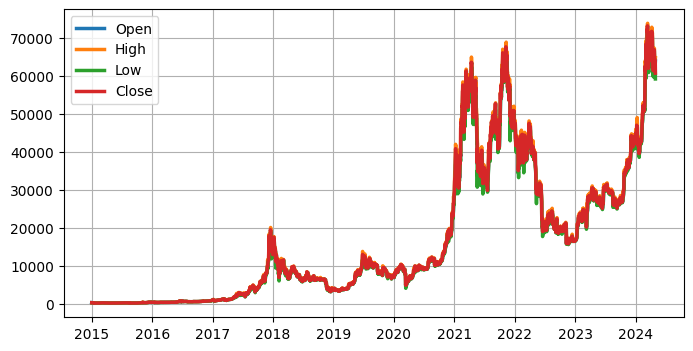

In [5]:
timeseries_matplotlib(dataset, ["Open", "High", "Low", "Close"])

### 3. Data Preprocessing

In [6]:
# call func preprocessing
scaler, scaled, x_train, y_train, x_test, y_test = preprocessing(dataset)

In [8]:
# check results
print(x_train.shape, y_train.shape)

(2666, 60, 1) (2666,)


In [9]:
# check results
print(x_test.shape, y_test.shape)

(622, 60, 1) (622,)


In [7]:
lineplot_matplotlib1(y_test, "Close Price")

TypeError: lineplot_matplotlib1() missing 2 required positional arguments: 'label' and 'title'

### 4 Model Predictions

- training models

In [ ]:
history, predictions = get_models(algorithms, x_train, y_train, x_test, y_test)

- loss function

In [ ]:
# show loss function
lineplot_matplotlib1(history.history['loss'], "loss func")

- results predictions

In [ ]:
# show predictions
lineplot_matplotlib2(
  line1=y_test, label1="actual data",
  line2=predictions, label2="results predictions"
)

In [ ]:
# calculate eror
r, p_value, mae, rmse, mape = evaluate_models(y_test, predictions)

# show eror
print("Evaluate Models with : "+str(algorithms))
print("-------------------------------")
print("R       : "+str(r))
print("P-value : "+str(p_value))
print("MAE     : "+str(mae))
print("RMSE    : "+str(rmse))
print("MAPE    : "+str(mape))

- inverse predictions

In [ ]:
# inverse scaler predictions
inv_y_test = scaler.inverse_transform(y_test.reshape(-1,1))
inv_predictions = scaler.inverse_transform(predictions.reshape(-1,1))

# show predictions
lineplot_matplotlib2(
  line1=inv_y_test, label1="actual data",
  line2=inv_predictions, label2="results predictions"
)

In [ ]:
# calculate eror
r, p_value, mae, rmse, mape = evaluate_models(inv_y_test, inv_predictions)

# show eror
print("Evaluate Models with : "+str(algorithms))
print("-------------------------------")
print("R       : "+str(r))
print("P-value : "+str(p_value))
print("MAE     : "+str(mae))
print("RMSE    : "+str(rmse))
print("MAPE    : "+str(mape))

- Final Results Prediction

In [ ]:
fig, ax = plt.subplots(figsize = (8,4))
ax.plot(dataset["Date"].iloc[len(y_train)+120:].values, inv_y_test, color="tab:blue", label="actual data", linewidth=2)
ax.plot(dataset["Date"].iloc[len(y_train)+120:].values, inv_predictions, color="tab:red", label="results predictions", linewidth=2)

# set label-labels
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
ax.set_title("Results of Predictions BTC-USD with "+algorithms, fontsize=12)
ax.set_xlabel("", fontsize=10)
ax.set_ylabel("", fontsize=10)
ax.legend(loc="best")
ax.grid(True)

# show lineplot
plt.show()